https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset Heart Attack Analysis and Prediction Dataset. Goal: create a model that predicts if patients are at risk of heart attacks from characteristics of the individual such as if it smokes, sex, blood pressure, etc

In [11]:
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras-tuner ipywidgets


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [43]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Modules
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# TensorFlow and Keras Modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Keras Tuner
import keras_tuner as kt

# Jupyter Notebook Widgets
import ipywidgets as widgets
from IPython.display import display, clear_output

import tensorflow as tf


# Optional: Checking TensorFlow and Keras Tuner Versions for Compatibility
print("TensorFlow version:", tf.__version__)
print("Keras Tuner version:", kt.__version__)


TensorFlow version: 2.16.1
Keras Tuner version: 1.4.7


Importing necessary libraries

In [14]:

df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Loading CSV 
And displaying first 5 rows 

In [15]:

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Check for missing values

In [16]:

df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Get basic statistics

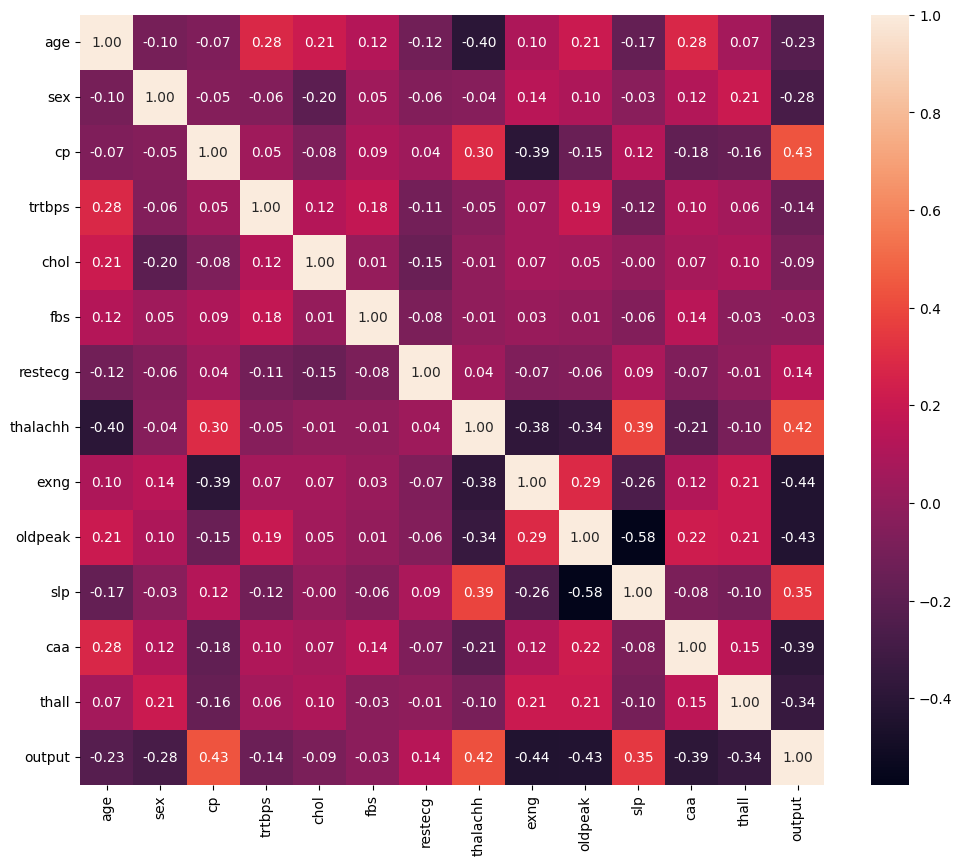

In [17]:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

Visualize the correlation matrix

In [18]:
X = df.drop('output', axis=1)
y = df['output']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Define features and target variable
Standardize the features

In [19]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


Spit into training and testing sets

In [21]:
model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/Users/lionelweng/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Define the model architecture

In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4679 - loss: 0.7619 - val_accuracy: 0.5200 - val_loss: 0.7427
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5029 - loss: 0.7139 - val_accuracy: 0.5200 - val_loss: 0.6878
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5934 - loss: 0.6498 - val_accuracy: 0.5600 - val_loss: 0.6440
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6607 - loss: 0.6250 - val_accuracy: 0.6000 - val_loss: 0.6069
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7167 - loss: 0.6018 - val_accuracy: 0.6400 - val_loss: 0.5732
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7839 - loss: 0.5501 - val_accuracy: 0.8000 - val_loss: 0.5393
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7738 - loss: 0.5418 - val_accuracy: 0.8400 - val_loss: 0.5109
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8111 - loss: 0.4866 - val_accuracy: 0.8400 - val_loss:

Train the model

In [24]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_acc:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.4757 

Test Accuracy: 0.84


Evaluate on the test set

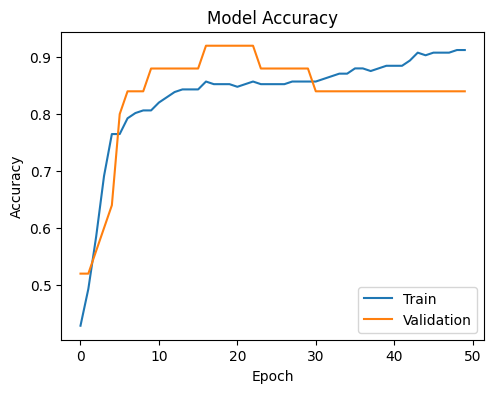

In [25]:

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Plot training & validation accuracy values

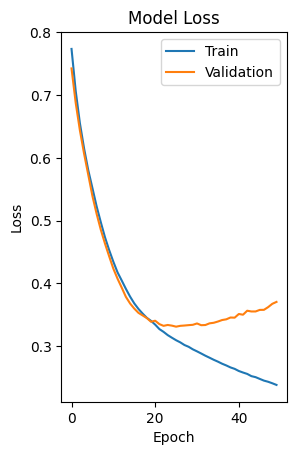

In [26]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [27]:
plt.show()

Predict probabilities

In [28]:

y_pred_prob = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Convert probabilities to class labels

In [29]:

y_pred = (y_pred_prob > 0.5).astype(int).flatten()

Classification Report

In [30]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Confusion Matrix

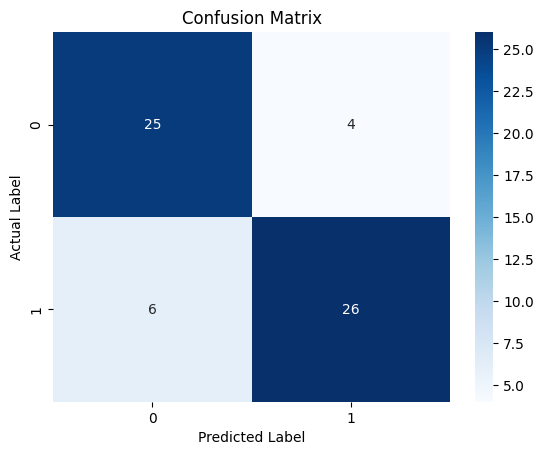

In [31]:

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [32]:
model.save('heart_attack_model_v1.h5')

In [33]:
def build_model(hp):
    model = keras.Sequential()

Tune the number of layers between 1 and 3
Add dropout to prevent overfitting
Tune the learning rate

In [36]:
def build_model(hp):
    model = keras.Sequential()
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int('units_' + str(i),
                         min_value=8,
                         max_value=64,
                         step=8),
            activation='relu'))
        model.add(layers.Dropout(
            rate=hp.Float('dropout_rate_' + str(i),
                          min_value=0.0,
                          max_value=0.5,
                          step=0.1)))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model


In [37]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='kt_dir',
    project_name='heart_attack_prediction')

Reloading Tuner from kt_dir/heart_attack_prediction/tuner0.json


In [38]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.1,
             callbacks=[early_stopping])


In [39]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.
Optimal number of layers: {best_hps.get('num_layers')}
""")

for i in range(best_hps.get('num_layers')):
    print(f"Units in layer {i}: {best_hps.get('units_' + str(i))}")
    print(f"Dropout rate in layer {i}: {best_hps.get('dropout_rate_' + str(i))}")
    
print(f"Optimal learning rate: {best_hps.get('learning_rate')}")



The hyperparameter search is complete.
Optimal number of layers: 1

Units in layer 0: 56
Dropout rate in layer 0: 0.4
Optimal learning rate: 0.01


Build the best model & train

In [44]:
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stopping])


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5663 - loss: 0.6800 - val_accuracy: 0.8400 - val_loss: 0.4083
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7416 - loss: 0.4869 - val_accuracy: 0.8400 - val_loss: 0.3533
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8046 - loss: 0.4040 - val_accuracy: 0.8400 - val_loss: 0.3439
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8175 - loss: 0.4045 - val_accuracy: 0.8400 - val_loss: 0.3399
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8835 - loss: 0.2884 - val_accuracy: 0.8000 - val_loss: 0.3444
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.3404 - val_accuracy: 0.8400 - val_loss: 0.3359
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8752 - loss: 0.3165 - val_accuracy: 0.8400 - val_loss: 0.3497
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8915 - loss: 0.2971 - val_accuracy: 0.8400 - val_loss: 0.3548

Plot training & validation accuracy values

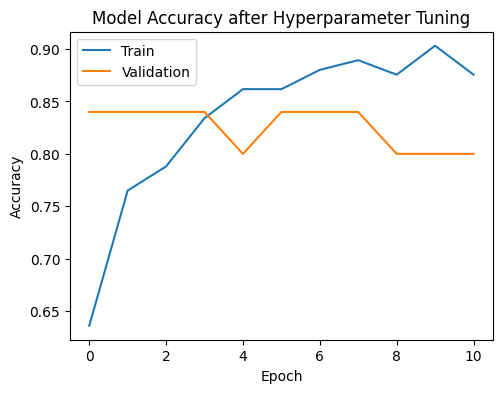

In [45]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy after Hyperparameter Tuning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



Plot training & validation loss values

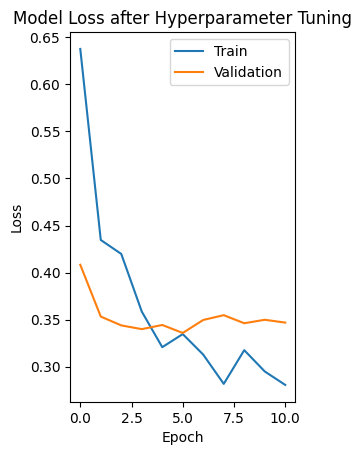

In [46]:


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss after Hyperparameter Tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [47]:
y_pred_prob = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [48]:
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:

model.save('heart_attack_model_v2.h5')

: 